# Explore here

In [1]:
# Your code here
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2025-03-06 01:45:49.748686: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 01:45:49.752218: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 01:45:49.762130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741225549.791443   33240 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741225549.799358   33240 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 01:45:49.828601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
carpeta_train = '../data/raw/train'
carpeta_test = '../data/raw/test1'

# Crear subcarpetas cat y dog si no existen
os.makedirs(carpeta_train + '/cat', exist_ok=True)
os.makedirs(carpeta_train + '/dog', exist_ok=True)

# Separar imagenes de train en subcarpetas cat y dog por el nombre de la imagen
for file in os.listdir(carpeta_train):
    if 'cat' in file:
        # Saltar si es un directorio
        if os.path.isdir(carpeta_train + '/' + file):
            continue
        os.rename(carpeta_train + '/' + file, carpeta_train + '/cat/' + file)
    elif 'dog' in file:
        # Saltar si es un directorio
        if os.path.isdir(carpeta_train + '/' + file):
            continue
        os.rename(carpeta_train + '/' + file, carpeta_train + '/dog/' + file)

In [ ]:
subfolder_perros = '../data/raw/train/dog'
subfolder_gatos = '../data/raw/train/cat'

#obtener una lista de todos los nombres de los archivos de perros
perros = os.listdir(subfolder_perros)
#obtener una lista de todos los nombres de los archivos de gatos
gatos = os.listdir(subfolder_gatos)

#cargar las nueve primeras imagenes de perros
imagenes_perros =[]
for i in range(9):
    img = image.load_img(subfolder_perros + '/' + perros[i], target_size=(200, 200))
    img = image.img_to_array(img)
    imagenes_perros.append(img)

#creo una figura de 3x3 para mostrar las imagenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagenes_perros[i].astype(np.uint8))
    plt.axis('off')
    plt.title('imagen de Perro')
plt.show()

IndexError: list index out of range

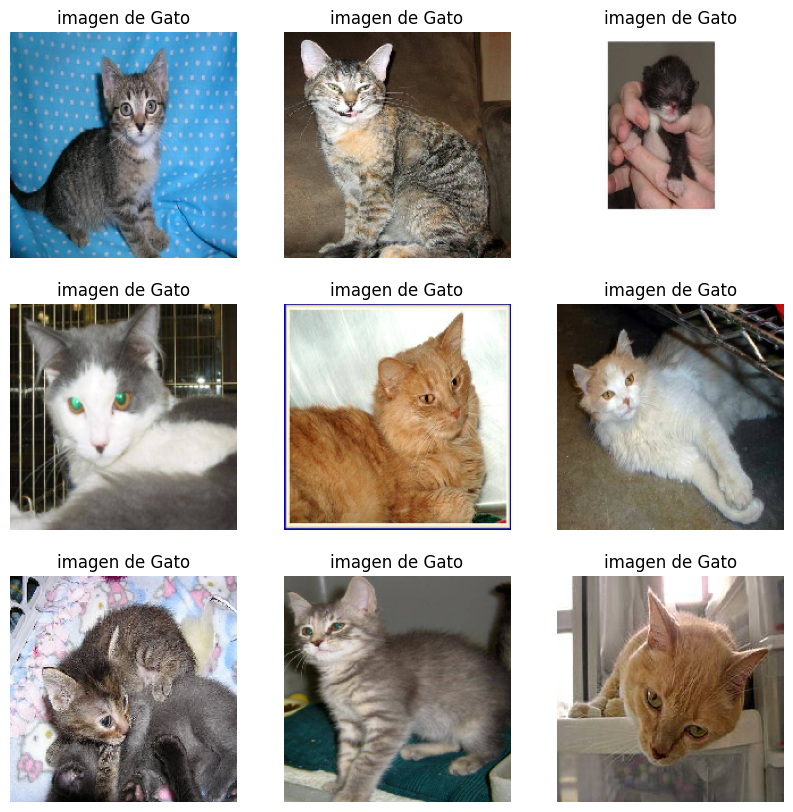

In [13]:
#cargar las nueve primeras imagenes de gatos
imagenes_gatos =[]
for i in range(9):
    img = image.load_img(subfolder_gatos + '/' + gatos[i], target_size=(200, 200))
    img = image.img_to_array(img)
    imagenes_gatos.append(img)

#creo una figura de 3x3 para mostrar las imagenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagenes_gatos[i].astype(np.uint8))
    plt.axis('off')
    plt.title('imagen de Gato')
plt.show()


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#creamos reglas de preprocesamiento para las imagenes
train_dir = 'data/raw/train'
test_dir = 'data/raw/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir, 
                                              target_size=(200, 200),
                                              batch_size=32, 
                                              classes=['cat', 'dog'])

test_data = datagentest.flow_from_directory(test_dir,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test1'])

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#compilar el modelo con Adam
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_data, epochs = 1)

 55/782 ━━━━━━━━━━━━━━━━━━━━ 55:18 5s/step - accuracy: 0.4639 - loss: 498.4804